<a href="https://colab.research.google.com/github/HyunMiPark/study_AI/blob/main/%5B1%EC%A3%BC%EC%B0%A8%5DMNIST_%EC%98%88%EC%B8%A1_%EB%AA%A8%EB%8D%B8%EC%97%90_deep_learning_techniques_%EC%A0%81%EC%9A%A9%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

In [13]:
import numpy as np
import matplotlib.pyplot as plt


def accuracy(model, dataloader):
  cnt = 0
  acc = 0

  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')

    preds = model(inputs)
    preds = torch.argmax(preds, dim=-1)

    cnt += labels.shape[0]
    acc += (labels == preds).sum().item()

  return acc / cnt


def plot_acc(train_accs, test_accs, label1='train', label2='test'):
  x = np.arange(len(train_accs))

  plt.plot(x, train_accs, label=label1)
  plt.plot(x, test_accs, label=label2)
  plt.legend()
  plt.show()

In [14]:
transform = transforms.ToTensor()

trainset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform
)
testset = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

In [15]:
batch_size = 256

trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=batch_size,
    shuffle=True
)
testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=batch_size,
    shuffle=False
)

In [16]:
from torch import nn

#LeakyReLU
class Model1(nn.Module):
  def __init__(self, input_dim, n_dim):
    super().__init__()

    self.layer1 = nn.Linear(input_dim, n_dim)
    self.layer2 = nn.Linear(n_dim, n_dim)
    self.layer3 = nn.Linear(n_dim, 10)

    self.act = nn.LeakyReLU()

  def forward(self, x):
    x = torch.flatten(x, start_dim=1)
    x = self.act(self.layer1(x))
    x = self.act(self.layer2(x))
    x = self.act(self.layer3(x))

    return x

In [17]:
# SGD
from torch.optim import SGD, Adam

lr = 0.001

model = Model1(32 * 32 * 3, 1024)
model = model.to('cuda')

optimizer = SGD(model.parameters(), lr=lr)

n_epochs = 50
loss_fn = nn.CrossEntropyLoss()

train_sgd = []

for epoch in range(n_epochs):
  total_loss = 0.
  for data in trainloader:
    model.zero_grad()
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')

    preds = model(inputs)
    loss = loss_fn(preds, labels)
    loss.backward()
    optimizer.step()

    total_loss += loss.item()

  train_sgd.append(accuracy(model, trainloader))

  print(f"Epoch {epoch + 1:3d} | Loss: {total_loss}")

Epoch   1 | Loss: 450.9754400253296
Epoch   2 | Loss: 450.36527490615845
Epoch   3 | Loss: 449.7993218898773
Epoch   4 | Loss: 449.19088315963745
Epoch   5 | Loss: 448.62099385261536
Epoch   6 | Loss: 448.07537031173706
Epoch   7 | Loss: 447.5446479320526
Epoch   8 | Loss: 446.97917461395264
Epoch   9 | Loss: 445.98544335365295
Epoch  10 | Loss: 444.9246447086334
Epoch  11 | Loss: 443.88803243637085
Epoch  12 | Loss: 442.84698152542114
Epoch  13 | Loss: 441.8516585826874
Epoch  14 | Loss: 440.829993724823
Epoch  15 | Loss: 439.7752456665039
Epoch  16 | Loss: 438.79149985313416
Epoch  17 | Loss: 437.8055257797241
Epoch  18 | Loss: 436.78707242012024
Epoch  19 | Loss: 435.8354158401489
Epoch  20 | Loss: 434.828476190567
Epoch  21 | Loss: 433.8881459236145
Epoch  22 | Loss: 432.9498407840729
Epoch  23 | Loss: 432.00500440597534
Epoch  24 | Loss: 431.0858807563782
Epoch  25 | Loss: 430.2461287975311
Epoch  26 | Loss: 429.4090778827667
Epoch  27 | Loss: 428.57448840141296
Epoch  28 | Loss: 

In [19]:
from torch.optim import Adam

# ADAM
model = Model1(32 * 32 * 3, 1024)
model = model.to('cuda')

optimizer = Adam(model.parameters(), lr=lr)

train_adam = []
test_adam = []

for epoch in range(n_epochs):
  total_loss = 0.
  for data in trainloader:
    model.zero_grad()
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')

    preds = model(inputs)
    loss = loss_fn(preds, labels)
    loss.backward()
    optimizer.step()

    total_loss += loss.item()

  train_adam.append(accuracy(model, trainloader))
  test_adam.append(accuracy(model, testloader))

  print(f"Epoch {epoch + 1:3d} | Loss: {total_loss}")

Epoch   1 | Loss: 433.85042548179626
Epoch   2 | Loss: 395.3420978784561
Epoch   3 | Loss: 373.4578013420105
Epoch   4 | Loss: 356.64006876945496
Epoch   5 | Loss: 344.19843912124634
Epoch   6 | Loss: 334.0880709886551
Epoch   7 | Loss: 327.1679846048355
Epoch   8 | Loss: 321.5865466594696
Epoch   9 | Loss: 315.0853977203369
Epoch  10 | Loss: 307.58431220054626
Epoch  11 | Loss: 301.7753304243088
Epoch  12 | Loss: 296.73929727077484
Epoch  13 | Loss: 292.3071390390396
Epoch  14 | Loss: 286.48370707035065
Epoch  15 | Loss: 283.75536608695984
Epoch  16 | Loss: 279.79942893981934
Epoch  17 | Loss: 275.92499029636383
Epoch  18 | Loss: 270.8590581417084
Epoch  19 | Loss: 269.60279393196106
Epoch  20 | Loss: 265.4088704586029
Epoch  21 | Loss: 262.12496614456177
Epoch  22 | Loss: 258.80897855758667
Epoch  23 | Loss: 254.7976666688919
Epoch  24 | Loss: 253.26148748397827
Epoch  25 | Loss: 251.9188723564148
Epoch  26 | Loss: 244.96072053909302
Epoch  27 | Loss: 245.51270508766174
Epoch  28 | L

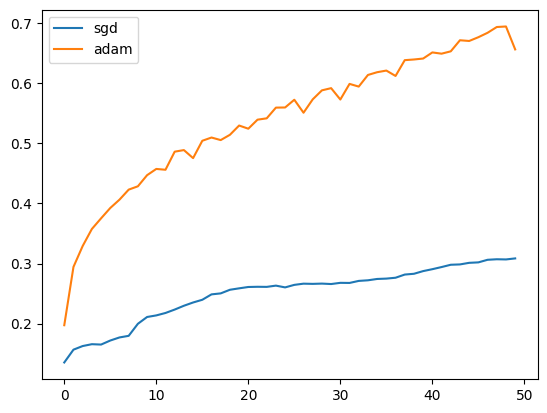

In [20]:
#SGD / ADAM 수치 비교
plot_acc(train_sgd, train_adam, 'sgd', 'adam')

In [ ]:
class Model2(nn.Module):
  def __init__(self, input_dim, n_dim):
    super().__init__()

    self.layer1 = nn.Linear(input_dim, n_dim)
    self.layer2 = nn.Linear(n_dim, n_dim)
    self.layer3 = nn.Linear(n_dim, 10)

    self.act = nn.Sigmoid()

  def forward(self, x):
    x = torch.flatten(x, start_dim=1)
    x = self.act(self.layer1(x))
    x = self.act(self.layer2(x))
    x = self.act(self.layer3(x))

    return x

In [ ]:
model = Model2(32 * 32 * 3, 1024)
model = model.to('cuda')

optimizer = Adam(model.parameters(), lr=lr)

train_sigmoid = []

for epoch in range(n_epochs):
  total_loss = 0.
  for data in trainloader:
    model.zero_grad()
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')

    preds = model(inputs)
    loss = loss_fn(preds, labels)
    loss.backward()
    optimizer.step()

    total_loss += loss.item()

  train_sigmoid.append(accuracy(model, trainloader))

  print(f"Epoch {epoch + 1:3d} | Loss: {total_loss}")

In [ ]:
plot_acc(train_adam, train_sigmoid, 'relu', 'sigmoid')

In [ ]:
# Dropout

class Model3(nn.Module):
  def __init__(self, input_dim, n_dim):
    super().__init__()

    self.layer1 = nn.Linear(input_dim, n_dim)
    self.layer2 = nn.Linear(n_dim, n_dim)
    self.layer3 = nn.Linear(n_dim, 10)

    self.act = nn.LeakyReLU()
    self.dropout = nn.Dropout(p=0.1)

  def forward(self, x):
    x = torch.flatten(x, start_dim=1)
    x = self.dropout(self.act(self.layer1(x)))
    x = self.dropout(self.act(self.layer2(x)))
    x = self.dropout(self.act(self.layer3(x)))

    return x

In [ ]:
model = Model3(32 * 32 * 3, 1024)
model = model.to('cuda')

optimizer = Adam(model.parameters(), lr=lr)

train_dropout = []
test_dropout = []

for epoch in range(n_epochs):
  total_loss = 0.
  model.train()
  for data in trainloader:
    model.zero_grad()
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')

    preds = model(inputs)
    loss = loss_fn(preds, labels)
    loss.backward()
    optimizer.step()

    total_loss += loss.item()

  with torch.no_grad():
    model.eval()
    train_dropout.append(accuracy(model, trainloader))
    test_dropout.append(accuracy(model, testloader))

  print(f"Epoch {epoch + 1:3d} | Loss: {total_loss}")

In [ ]:
plot_acc(train_adam, test_adam)

In [ ]:
plot_acc(train_dropout, test_dropout)